# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [8]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [9]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [10]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

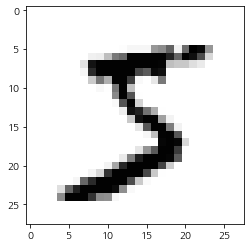

In [11]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [12]:
y_train.shape

(60000,)

In [13]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [14]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [31]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

rmsprop = optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [34]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [35]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

2022-02-03 13:38:51.660822: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2590 - accuracy: 0.9256
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0686 - accuracy: 0.9799
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0291 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0218 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0122 - accuracy: 0.9969
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9973

95%이상의 성능을 가진 모델을 만들면 완성!

In [36]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

2022-02-03 13:39:26.425624: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - loss: 0.0661 - accuracy: 0.9812

Accuracy: 0.9811999797821045


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)